In [3]:
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
print(librosa.__version__)
import numpy as np

0.10.0.post2


In [4]:
import librosa.display

In [5]:
#load audio file
audio_file='twinkle.mp3'
ipd.Audio(audio_file)

In [6]:
audio,sr = librosa.load(audio_file)
audio

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [7]:
#sample size      ^- sr is sampling rate
audio.size

759168

In [8]:
#1 sample duration
sample_dur = (1/sr)
print(f"sample rate of one sample is {sample_dur:.6f} seconds")

sample rate of one sample is 0.000045 seconds


In [9]:
duration = sample_dur * (audio.size)
print(f"duration of signal is {duration:.8f} seconds")

duration of signal is 34.42938776 seconds


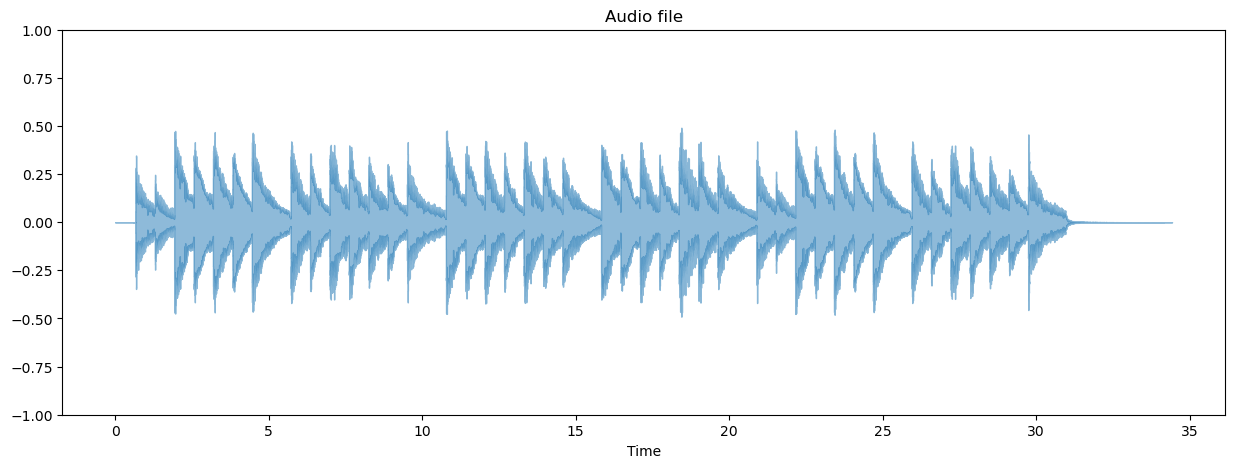

In [10]:
#visualize waveforms
plt.figure(figsize=(15,17))
plt.subplot(3,1,3)      #3row,1col,1 index
librosa.display.waveshow(audio,alpha = 0.5)
plt.title("Audio file")
plt.ylim(-1,1)
plt.show()

In [11]:
#calculate amplitude envelope
FRAME_SIZE= 1024
HOP_SIZE =512
def amp_env(signal,frame_size,hop_length):
    amp_env=[]
    for i in range(0, len(signal),hop_length):
        current_frame_amp = max(signal[i:i+frame_size])
        amp_env.append(current_frame_amp)
    return np.array(amp_env)

def fancy_amp(signal, frame_size,hop_length):
    return np.array([max(signal[i:i+frame_size]) for i in range(0,signal.size,hop_length)])

In [12]:
ae = amp_env(audio,FRAME_SIZE,HOP_SIZE)
len(ae)

1483

In [13]:
fancy_ae =  fancy_amp(audio,FRAME_SIZE,HOP_SIZE)
(ae == fancy_ae).all()

True

In [14]:
ae_redhot = amp_env(audio,FRAME_SIZE,HOP_SIZE)

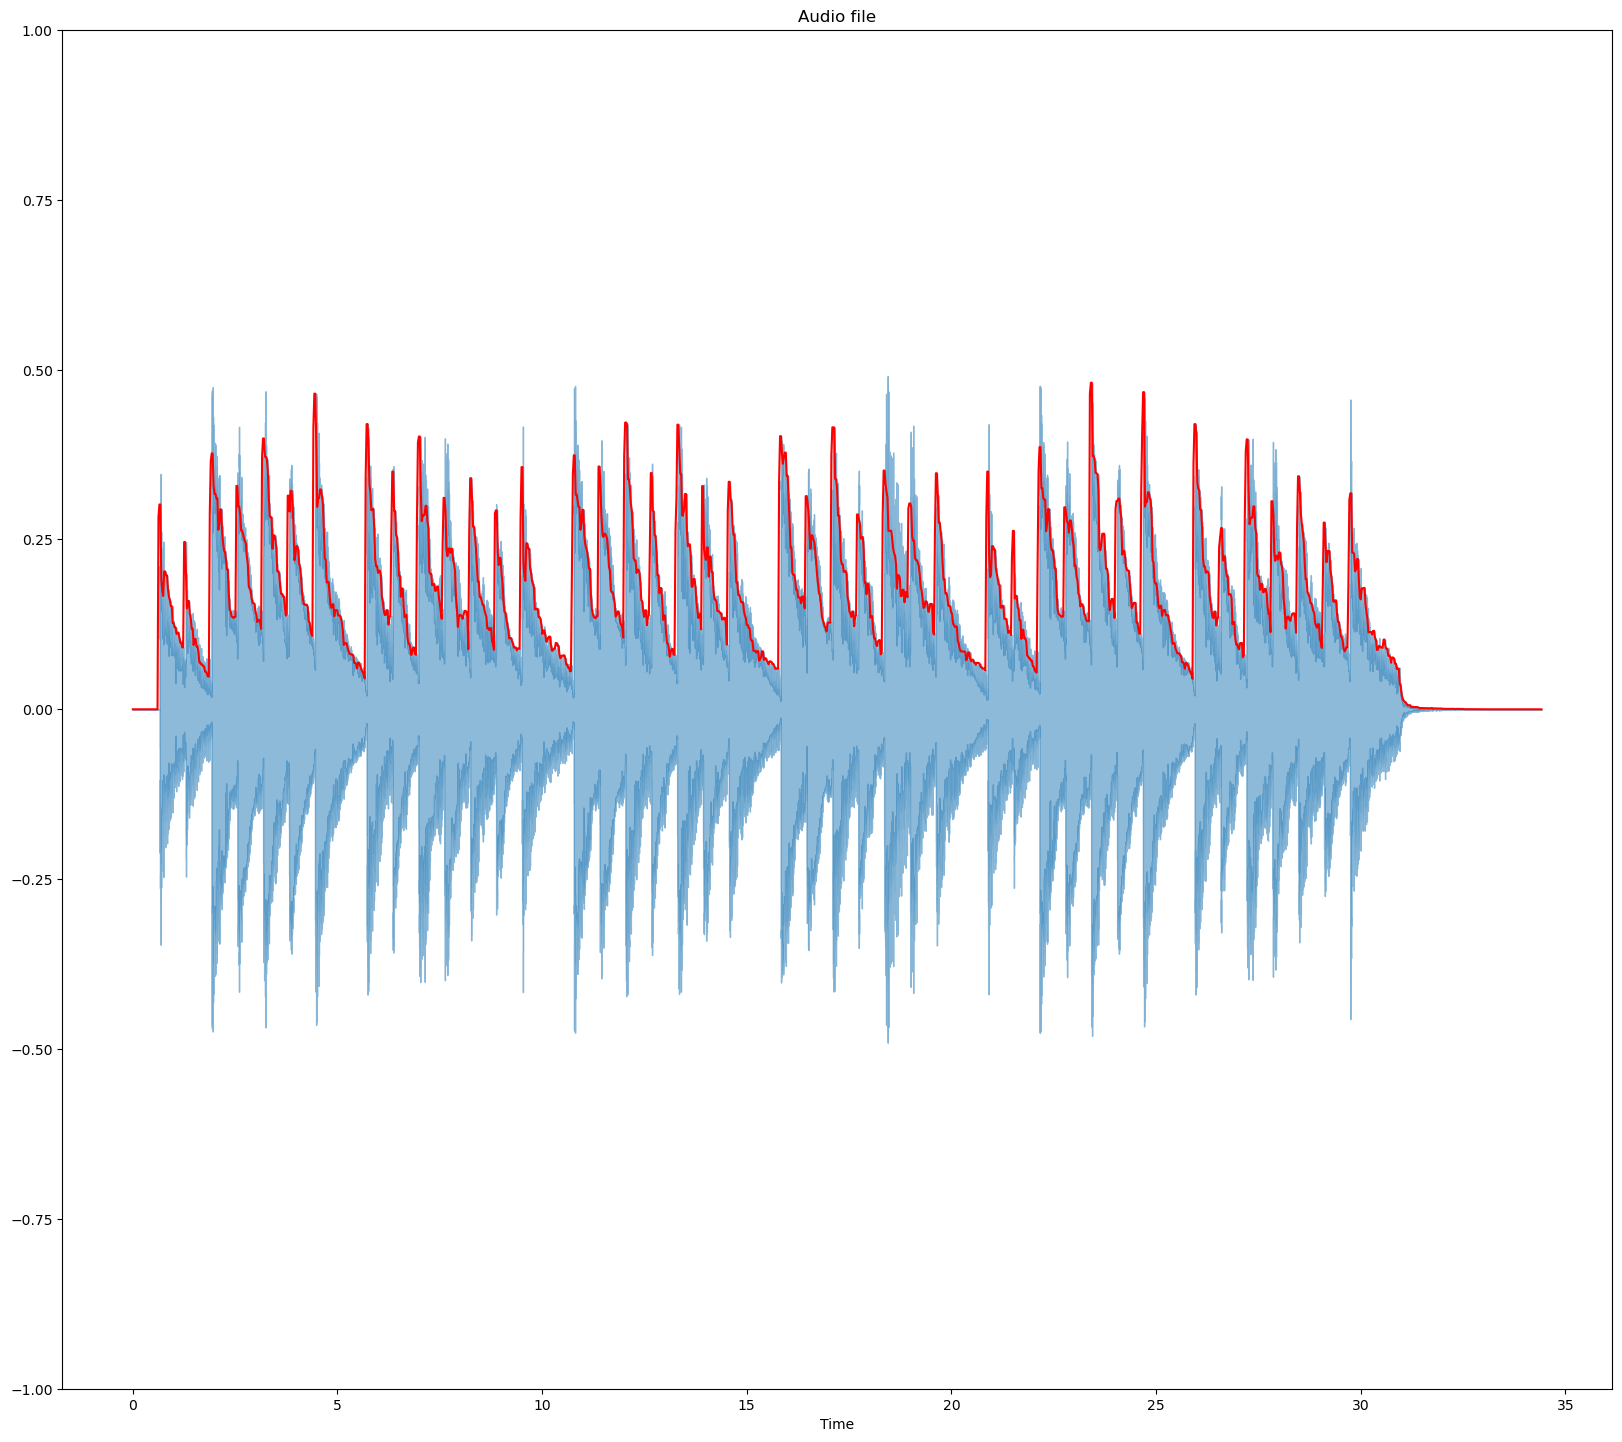

In [15]:
frames = range(0,ae.size)
t= librosa.frames_to_time(frames,hop_length=HOP_SIZE)  #time
#visualize envelope
plt.figure(figsize=(20,60))
plt.subplot(3,1,2)      #3row,1col,1 index
librosa.display.waveshow(audio,alpha = 0.5)
plt.plot(t,ae,color='r')
plt.title("Audio file")
plt.ylim(-1,1)
plt.show()

In [16]:
audio_file = 'twinkle.mp3'
audio, sr = librosa.load(audio_file)

# Compute the Short-Time Fourier Transform (STFT)
stft = librosa.stft(audio)

# Calculate the pitch for each frame
frequencies, magnitudes = librosa.piptrack(S=stft)
pitch_per_frame = np.nanargmax(magnitudes, axis=0)
pitch_per_frame = [frequencies[i, t] for t, i in enumerate(pitch_per_frame)]

# Define a mapping from frequencies to notes
# Adjust these values based on the specific octave range in your audio
note_mapping = {
    261.63: 'C4',
    277.18: 'C#4',  # Added C#
    293.66: 'D4',
    311.13: 'D#4',  # Added D#
    329.63: 'E4',
    349.23: 'F4',   # Added F
    369.99: 'F#4',  # Added F#
    392.00: 'G4',
    415.30: 'G#4',  # Added G#
    440.00: 'A4',
    466.16: 'A#4',  # Added A#
    493.88: 'B4',
    # Add more frequencies and notes as needed
}

# Calculate the average pitch for every 132 frames
frame_interval = 34
average_pitch_every_132_frames = []
for i in range(0, len(pitch_per_frame), frame_interval):
    frame_slice = pitch_per_frame[i:i + frame_interval]
    average_pitch = np.nanmean(frame_slice)  # Calculate the mean, ignoring NaN values
    average_pitch_every_132_frames.append(average_pitch)

# Map average pitch to note names
average_notes_every_132_frames = []
for avg_pitch in average_pitch_every_132_frames:
    note = None
    for freq, note_name in note_mapping.items():
        if abs(freq - avg_pitch) < 10:  # Adjust the threshold as needed
            note = note_name
            break
    average_notes_every_132_frames.append(note)

# Display the average frequency and note for every 132 frames
print(f"Average Frequency and Notes for Every {frame_interval} Frames:")
for idx, (avg_pitch, avg_note) in enumerate(zip(average_pitch_every_132_frames, average_notes_every_132_frames)):
    print(f"Frames {idx * frame_interval + 1}-{(idx + 1) * frame_interval}: {avg_pitch:.2f} Hz, {avg_note}")


Average Frequency and Notes for Every 34 Frames:
Frames 1-34: 135.84 Hz, None
Frames 35-68: 397.81 Hz, G4
Frames 69-102: 337.74 Hz, E4
Frames 103-136: 391.48 Hz, G4
Frames 137-170: 438.59 Hz, A4
Frames 171-204: 423.14 Hz, G#4
Frames 205-238: 391.33 Hz, G4
Frames 239-272: 358.84 Hz, F4
Frames 273-306: 365.82 Hz, F#4
Frames 307-340: 532.48 Hz, None
Frames 341-374: 328.43 Hz, E4
Frames 375-408: 518.83 Hz, None
Frames 409-442: 327.14 Hz, E4
Frames 443-476: 353.49 Hz, F4
Frames 477-510: 391.03 Hz, G4
Frames 511-544: 359.02 Hz, F4
Frames 545-578: 395.05 Hz, G4
Frames 579-612: 533.15 Hz, None
Frames 613-646: 328.41 Hz, E4
Frames 647-680: 284.68 Hz, C#4
Frames 681-714: 386.13 Hz, G4
Frames 715-748: 376.58 Hz, F#4
Frames 749-782: 349.23 Hz, F4
Frames 783-816: 437.17 Hz, A4
Frames 817-850: 442.16 Hz, A4
Frames 851-884: 316.34 Hz, D#4
Frames 885-918: 267.80 Hz, C4
Frames 919-952: 368.47 Hz, F#4
Frames 953-986: 388.00 Hz, G4
Frames 987-1020: 408.54 Hz, G#4
Frames 1021-1054: 440.05 Hz, A4
Frames 10